# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import numpy as np
import pandas as pd

In this lab, we will explore a dataset that describes websites with different features and labels them either benign or malicious . We will use supervised learning algorithms to figure out what feature patterns malicious websites are likely to have and use our model to predict malicious websites.

# Challenge 1 - Explore The Dataset

Let's start by exploring the dataset. First load the data file:

In [107]:
websites = pd.read_csv('website.csv')

#### Explore the data from an bird's-eye view.

You should already been very familiar with the procedures now so we won't provide the instructions step by step. Reflect on what you did in the previous labs and explore the dataset.

Things you'll be looking for:

* What the dataset looks like?
* What are the data types?
* Which columns contain the features of the websites?
* Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
* Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

Feel free to add additional cells for your explorations. Make sure to comment what you find out.

In [108]:
# Your code here
websites[0:5]

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,NaN,NaN,10/10/2015 18:21,NaN,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,NaN,NaN,NaN,NaN,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,NaN,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0


In [109]:
websites.shape

(1781, 21)

In [ ]:
websites.dtypes

,0
URL,object
URL_LENGTH,int64
NUMBER_SPECIAL_CHARACTERS,int64
CHARSET,object
SERVER,object
CONTENT_LENGTH,float64
WHOIS_COUNTRY,object
WHOIS_STATEPRO,object
WHOIS_REGDATE,object
WHOIS_UPDATED_DATE,object


In [110]:
websites[websites['Type']==0]['CHARSET'].value_counts()

,count
CHARSET,
UTF-8,544
ISO-8859-1,382
utf-8,359
us-ascii,151
iso-8859-1,121
ISO-8859,1
windows-1252,1


In [111]:
websites[websites['Type']==1]['CHARSET'].value_counts()

,count
CHARSET,
UTF-8,132
ISO-8859-1,45
utf-8,20
iso-8859-1,13
us-ascii,4
windows-1251,1


In [74]:
websites['WHOIS_REGDATE'][websites['Type']==1].value_counts().sort_index(ascending=False).head(15)

,count
WHOIS_REGDATE,
9/10/2016 17:08,1
9/10/2014 0:00,1
9/04/2002 0:00,4
9/03/2004 0:00,1
9/03/2000 17:50,1
9/02/2009 0:00,1
9/02/2007 0:00,1
9/02/2000 14:17,1
8/11/2014 7:41,2


In [ ]:
# Your comment here
# The dataset has 19 columns with features, 2 columns representing the target, and 1781 records.

# We have 7 features with strings and 14 features with numerical values (floats and integers)

# These are the features that are related to websites:
''' URL, URL_LENGTH, NUMBER_SPECIAL_CHARACTERS, CHARSET, SERVER,
CONTENT_LENGTH, WHOIS_COUNTRY, WHOIS_STATEPRO, WHOIS_REGDATE, WHOIS_UPDATED_DATE,
TCP_CONVERSATION_EXCHANGE, DIST_REMOTE_TCP_PORT, REMOTE_IPS, APP_BYTES,
SOURCE_APP_PACKETS, REMOTE_APP_PACKETS, SOURCE_APP_BYTES,
REMOTE_APP_BYTES, APP_PACKETS, DNS_QUERY_TIMES.'''

# Type and URL are our target. We will take only one of them. In URL, the malicious is represented by M. In Type, it's the number 1.

# These are the columns that I must transform in ordinal data: SERVER, WHOIS_COUNTRY, WHOIS_STATEPRO, WHOIS_REGDATE, WHOIS_UPDATED_DATE

# These are the columns that I will drop from the model, because they do not seem relevant to identify malicious websites:
'''CONTENT_LENGTH: a size of a response can vary regardless a website is malicious or not.
APP_BYTES, SOURCE_APP_PACKETS, REMOTE_APP_PACKETS, SOURCE_APP_BYTES, REMOTE_APP_BYTES, APP_PACKETS: these columns are more related to data transfer volume. Both malicious and benign websites can contain different content volumes.
A malicious website that mimics a benign website, for example, migh have similar content volume. Or both malicious and benign websites can have either complex or simple estructure. It is not a good indicator for this study.
'''
# The dates format is inconsistent. It is not possible to sort it. I will handle that in the next steps.


In [112]:
websites_relevant = websites[['URL', 'URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CHARSET', 'SERVER',
                     'WHOIS_COUNTRY', 'WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE',
                     'TCP_CONVERSATION_EXCHANGE', 'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS',
                     'DNS_QUERY_TIMES']]

#### Next, evaluate if the columns in this dataset are strongly correlated.

If our dataset has strongly correlated columns, we need to choose certain ML algorithms instead of others. We need to evaluate this for our dataset now.

Luckily, most of the columns in this dataset are ordinal which makes things a lot easier for us. In the next cells below, evaluate the level of collinearity of the data.

We provide some general directions for you to consult in order to complete this step:

1. You will create a correlation matrix using the numeric columns in the dataset.

1. Create a heatmap using `seaborn` to visualize which columns have high collinearity.

1. Comment on which columns you might need to remove due to high collinearity.

In [113]:
# Your code here
websites_relevant.select_dtypes(include=['number']).corr()


,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,DNS_QUERY_TIMES
URL_LENGTH,1.000000,0.917986,-0.038407,-0.039839,-0.046367,-0.068582
NUMBER_SPECIAL_CHARACTERS,0.917986,1.000000,-0.037459,-0.042619,-0.047103,-0.050048
TCP_CONVERSATION_EXCHANGE,-0.038407,-0.037459,1.000000,0.555188,0.331080,0.349832
DIST_REMOTE_TCP_PORT,-0.039839,-0.042619,0.555188,1.000000,0.210188,0.259942
REMOTE_IPS,-0.046367,-0.047103,0.331080,0.210188,1.000000,0.548189
DNS_QUERY_TIMES,-0.068582,-0.050048,0.349832,0.259942,0.548189,1.000000


<Axes: >

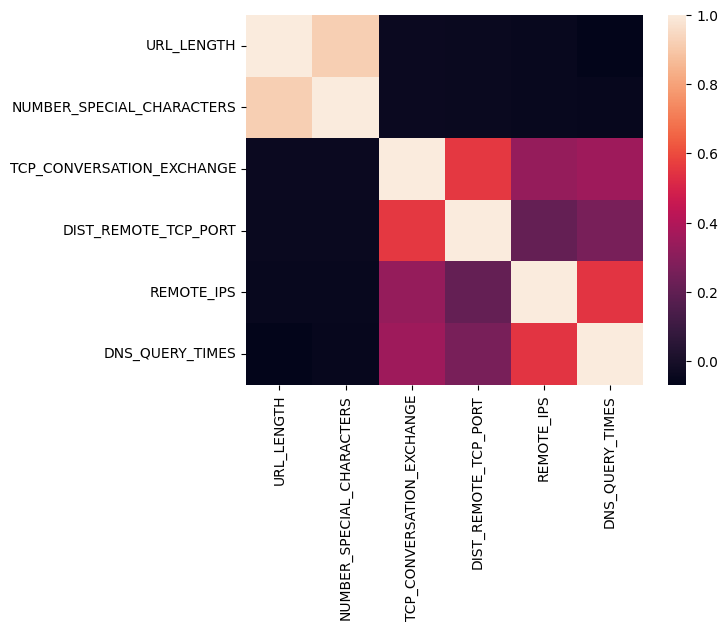

In [106]:
import seaborn as sns

sns.heatmap(websites_relevant.select_dtypes(include=['number']).corr())

In [ ]:
# Your comment here
# URL_LENGTH and NUMBER_SPECIAL_CHARACTERS are highly correlated. I must choose one of them to drop from the model. All the other columns have less than 70% correlation.
# I will drop NUMBER_SPECIAL_CHARACTERS as malicious websites can use regular characters to deceive users (duplicate letters, exchange l by I, o by 0 or vice-versa), therefore the URL_LENGTH seems more relevant to me.
# There were probably more correlated columns between the ones I dropped considering them irrelevant in a previous step.

# Challenge 2 - Remove Column Collinearity.

From the heatmap you created, you should have seen at least 3 columns that can be removed due to high collinearity. Remove these columns from the dataset.

Note that you should remove as few columns as you can. You don't have to remove all the columns at once. But instead, try removing one column, then produce the heatmap again to determine if additional columns should be removed. As long as the dataset no longer contains columns that are correlated for over 90%, you can stop. Also, keep in mind when two columns have high collinearity, you only need to remove one of them but not both.

In the cells below, remove as few columns as you can to eliminate the high collinearity in the dataset. Make sure to comment on your way so that the instructional team can learn about your thinking process which allows them to give feedback. At the end, print the heatmap again.

In [152]:
# Your code here
websites_relevant = websites[['URL', 'SERVER', 'CHARSET', 'URL_LENGTH',
                     'WHOIS_COUNTRY', 'WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE',
                     'TCP_CONVERSATION_EXCHANGE', 'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS',
                     'DNS_QUERY_TIMES', 'Type']]

In [153]:
# Your comment here.
# I have removed the following columns due to low relevance: CONTENT_LENGTH, APP_BYTES, SOURCE_APP_PACKETS, REMOTE_APP_PACKETS, SOURCE_APP_BYTES, REMOTE_APP_BYTES, APP_PACKETS.
# I have removed NUMBER_SPECIAL_CHARACTERS due to the strong correlation with URL_LENGTH.
# The remaining colunms seem relevant for the study and they are not highly correlated.

<Axes: >

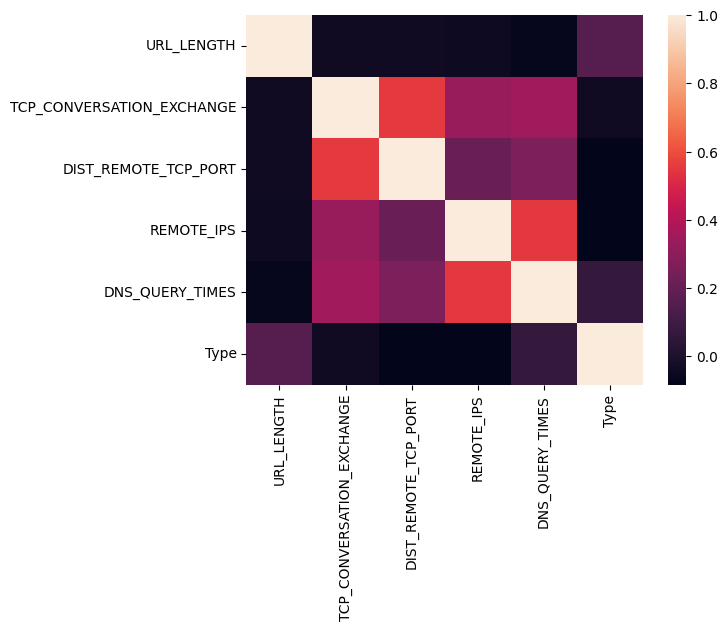

In [154]:
# Print heatmap again
sns.heatmap(websites_relevant.select_dtypes(include=['number']).corr())

# Challenge 3 - Handle Missing Values

The next step would be handling missing values. **We start by examining the number of missing values in each column, which you will do in the next cell.**

In [155]:
# Your code here
websites_relevant.isnull().sum()

,0
URL,0
SERVER,176
CHARSET,7
URL_LENGTH,0
WHOIS_COUNTRY,306
WHOIS_STATEPRO,362
WHOIS_REGDATE,127
WHOIS_UPDATED_DATE,139
TCP_CONVERSATION_EXCHANGE,0
DIST_REMOTE_TCP_PORT,0


If you remember in the previous labs, we drop a column if the column contains a high proportion of missing values. After dropping those problematic columns, we drop the rows with missing values.

#### In the cells below, handle the missing values from the dataset. Remember to comment the rationale of your decisions.

In [156]:
# Your code here
websites_relevant['SERVER'].value_counts().head(30)

,count
SERVER,
Apache,386
nginx,211
Microsoft-HTTPAPI/2.0,113
cloudflare-nginx,94
Microsoft-IIS/7.5,51
GSE,49
Server,49
YouTubeFrontEnd,42
nginx/1.12.0,36


In [157]:
websites_relevant['WHOIS_STATEPRO'].value_counts().head(30)

,count
WHOIS_STATEPRO,
CA,372
NY,75
WA,65
Barcelona,62
FL,61
Arizona,58
California,57
ON,45
NV,30


In [158]:
websites_relevant[['WHOIS_STATEPRO', 'WHOIS_COUNTRY']].sample(20)

,WHOIS_STATEPRO,WHOIS_COUNTRY
73,WC1N,GB
1176,ZH,NL
45,NaN,LU
397,NJ,US
784,Washington,US
1102,CA,US
1553,KS,US
836,NaN,NaN
429,CA,US
121,California,US


In [159]:
# Your comment here
# As we have countries already, that are easier to clean and work with, I am dropping the column WHOIS_STATEPRO.
# The column countries can be cleaned and reclassified.
# We can also replace the values of the Server column, as there are many servers sharing the same name, but different versions.

In [160]:
# Dropping WHOIS_STATEPRO as it's redundant with country
websites_relevant = websites_relevant.drop(columns=['WHOIS_STATEPRO'])

#### Again, examine the number of missing values in each column.

If all cleaned, proceed. Otherwise, go back and do more cleaning.

In [161]:
# Examine missing values in each column
websites_relevant.isnull().sum()

,0
URL,0
SERVER,176
CHARSET,7
URL_LENGTH,0
WHOIS_COUNTRY,306
WHOIS_REGDATE,127
WHOIS_UPDATED_DATE,139
TCP_CONVERSATION_EXCHANGE,0
DIST_REMOTE_TCP_PORT,0
REMOTE_IPS,0


# Challenge 4 - Handle `WHOIS_*` Categorical Data

There are several categorical columns we need to handle. These columns are:

* `URL`
* `CHARSET`
* `SERVER`
* `WHOIS_COUNTRY`
* `WHOIS_STATEPRO`
* `WHOIS_REGDATE`
* `WHOIS_UPDATED_DATE`

How to handle string columns is always case by case. Let's start by working on `WHOIS_COUNTRY`. Your steps are:

1. List out the unique values of `WHOIS_COUNTRY`.
1. Consolidate the country values with consistent country codes. For example, the following values refer to the same country and should use consistent country code:
    * `CY` and `Cyprus`
    * `US` and `us`
    * `SE` and `se`
    * `GB`, `United Kingdom`, and `[u'GB'; u'UK']`

#### In the cells below, fix the country values as intructed above.

In [162]:
# Your code here
websites_relevant['WHOIS_COUNTRY'].value_counts()


,count
WHOIS_COUNTRY,
US,1103
CA,84
ES,63
AU,35
PA,21
GB,19
JP,11
UK,10
CN,10


In [163]:
country_replacements = {
    'CY': 'CY', 'Cyprus': 'CY',
    'US': 'US', 'us': 'US',
    'SE': 'SE', 'se': 'SE',
    'GB': 'GB', 'United Kingdom': 'GB', "[u'GB'; u'UK']": 'GB'
}

# Replace inconsistent values in the 'WHOIS_COUNTRY' column using the dictionary
websites_relevant['WHOIS_COUNTRY'] = websites_relevant['WHOIS_COUNTRY'].replace(country_replacements)

In [164]:
websites_relevant['WHOIS_COUNTRY'].value_counts()

,count
WHOIS_COUNTRY,
US,1106
CA,84
ES,63
AU,35
GB,25
PA,21
JP,11
UK,10
CN,10


Since we have fixed the country values, can we convert this column to ordinal now?

Not yet. If you reflect on the previous labs how we handle categorical columns, you probably remember we ended up dropping a lot of those columns because there are too many unique values. Too many unique values in a column is not desirable in machine learning because it makes prediction inaccurate. But there are workarounds under certain conditions. One of the fixable conditions is:

#### If a limited number of values account for the majority of data, we can retain these top values and re-label all other rare values.

The `WHOIS_COUNTRY` column happens to be this case. You can verify it by print a bar chart of the `value_counts` in the next cell to verify:

<Axes: xlabel='count', ylabel='WHOIS_COUNTRY'>

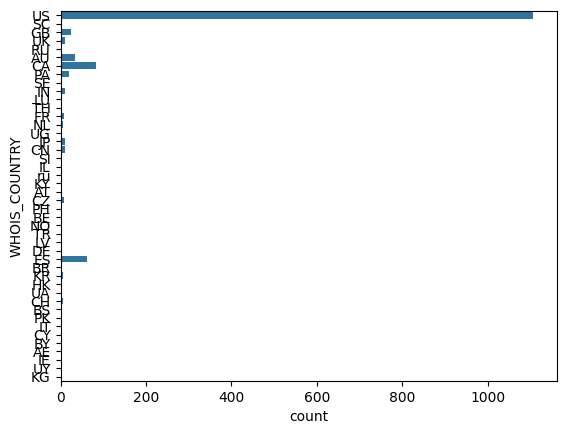

In [165]:
# Your code here
sns.countplot(websites_relevant['WHOIS_COUNTRY'])

#### After verifying, now let's keep the top 10 values of the column and re-label other columns with `OTHER`.

In [166]:
# Your code here
# Getting the top 10 countries
top_10_countries = websites_relevant['WHOIS_COUNTRY'].value_counts().nlargest(10).index

# Changing names by 'OTHER' to the countries outside the top 10
websites_relevant['WHOIS_COUNTRY'] = websites_relevant['WHOIS_COUNTRY'].apply(lambda x: x if x in top_10_countries else "OTHER")


Now since `WHOIS_COUNTRY` has been re-labelled, we don't need `WHOIS_STATEPRO` any more because the values of the states or provinces may not be relevant any more. We'll drop this column.

In addition, we will also drop `WHOIS_REGDATE` and `WHOIS_UPDATED_DATE`. These are the registration and update dates of the website domains. Not of our concerns.

#### In the next cell, drop `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [167]:
# Your code here (WHOIS_STATEPRO has been dropped earlier)
websites_relevant = websites_relevant.drop(columns=['WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'])

# Challenge 5 - Handle Remaining Categorical Data & Convert to Ordinal

Now print the `dtypes` of the data again. Besides `WHOIS_COUNTRY` which we already fixed, there should be 3 categorical columns left: `URL`, `CHARSET`, and `SERVER`.

In [168]:
# Your code here
websites_relevant.dtypes

,0
URL,object
SERVER,object
CHARSET,object
URL_LENGTH,int64
WHOIS_COUNTRY,object
TCP_CONVERSATION_EXCHANGE,int64
DIST_REMOTE_TCP_PORT,int64
REMOTE_IPS,int64
DNS_QUERY_TIMES,float64
Type,int64


#### `URL` is easy. We'll simply drop it because it has too many unique values that there's no way for us to consolidate.

In [169]:
# Your code here
websites_relevant = websites_relevant.drop(columns=['URL'])

#### Print the unique value counts of `CHARSET`. You see there are only a few unique values. So we can keep it as it is.

In [170]:
# Your code here
websites_relevant['CHARSET'].value_counts()

,count
CHARSET,
UTF-8,676
ISO-8859-1,427
utf-8,379
us-ascii,155
iso-8859-1,134
windows-1251,1
ISO-8859,1
windows-1252,1


`SERVER` is a little more complicated. Print its unique values and think about how you can consolidate those values.

#### Before you think of your own solution, don't read the instructions that come next.

In [171]:
# Your code here
websites_relevant['SERVER'].unique()

array(['nginx', 'Apache/2.4.10', 'Microsoft-HTTPAPI/2.0', nan, 'Apache/2',
       'nginx/1.10.1', 'Apache', 'Apache/2.2.15 (Red Hat)',
       'Apache/2.4.23 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'openresty/1.11.2.1', 'Apache/2.2.22', 'Apache/2.4.7 (Ubuntu)',
       'nginx/1.12.0',
       'Apache/2.4.12 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'Oracle-iPlanet-Web-Server/7.0', 'cloudflare-nginx', 'nginx/1.6.2',
       'openresty', 'Heptu web server', 'Pepyaka/1.11.3', 'nginx/1.8.0',
       'nginx/1.10.1 + Phusion Passenger 5.0.30',
       'Apache/2.2.29 (Amazon)', 'Microsoft-IIS/7.5', 'LiteSpeed',
       'Apache/2.4.25 (cPanel) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'tsa_c', 'Apache/2.2.0 (Fedora)', 'Apache/2.2.22 (Debian)',
       'Apache/2.2.15 (CentOS)', 'Apache/2.4.25',
       'Apache/2.4.25 (Amazon) PHP/7.0.14', 'GSE',
       'Apache/2.4.23 (Unix) OpenSSL/0.9.8e-fips-rhel5 mod_bwlimited/1.4',
       'Apache/2.4.25 (Amazon) OpenSSL/1.0.1k-fips',
 

![Think Hard](../images/think-hard.jpg)

In [172]:
# Your comment here
# As mentioned way above, most of the servers seems to be from the same service and only the version changes.

Although there are so many unique values in the `SERVER` column, there are actually only 3 main server types: `Microsoft`, `Apache`, and `nginx`. Just check if each `SERVER` value contains any of those server types and re-label them. For `SERVER` values that don't contain any of those substrings, label with `Other`.

At the end, your `SERVER` column should only contain 4 unique values: `Microsoft`, `Apache`, `nginx`, and `Other`.

In [174]:
# Your code here

# Creating a function to categorize SERVER:
def categorize_server(server):
    if pd.isnull(server): # I had to add this clause to iterate with a float
        return "Other"
    elif "Microsoft" in server:
        return "Microsoft"
    elif "Apache" in server:
        return "Apache"
    elif "nginx" in server:
        return "nginx"
    else:
        return "Other"

# Apply to the SERVER column:
websites_relevant['SERVER'] = websites_relevant['SERVER'].apply(categorize_server)

# Check unique values:
websites_relevant['SERVER'].unique()


array(['nginx', 'Apache', 'Microsoft', 'Other'], dtype=object)

In [175]:
# Count `SERVER` value counts here
websites_relevant['SERVER'].value_counts()

,count
SERVER,
Apache,643
Other,505
nginx,435
Microsoft,198


OK, all our categorical data are fixed now. **Let's convert them to ordinal data using Pandas' `get_dummies` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)). Also, assign the data with dummy values to a new variable `website_dummy`.**

In [180]:
# Your code here
websites_dummy = pd.get_dummies(websites_relevant, columns=['SERVER', 'CHARSET', 'WHOIS_COUNTRY'])

Now, inspect `website_dummy` to make sure the data and types are intended - there shouldn't be any categorical columns at this point.

In [181]:
# Your code here
websites_dummy.dtypes

,0
URL_LENGTH,int64
TCP_CONVERSATION_EXCHANGE,int64
DIST_REMOTE_TCP_PORT,int64
REMOTE_IPS,int64
DNS_QUERY_TIMES,float64
Type,int64
SERVER_Apache,bool
SERVER_Microsoft,bool
SERVER_Other,bool
SERVER_nginx,bool


In [185]:
websites_dummy.isnull().sum()

,0
URL_LENGTH,0
TCP_CONVERSATION_EXCHANGE,0
DIST_REMOTE_TCP_PORT,0
REMOTE_IPS,0
DNS_QUERY_TIMES,1
Type,0
SERVER_Apache,0
SERVER_Microsoft,0
SERVER_Other,0
SERVER_nginx,0


In [186]:
# Drop the null value row from the DNS_QUERY_TIMES column

websites_dummy = websites_dummy.dropna(subset=['DNS_QUERY_TIMES'])

In [187]:
websites_dummy.isnull().sum()

,0
URL_LENGTH,0
TCP_CONVERSATION_EXCHANGE,0
DIST_REMOTE_TCP_PORT,0
REMOTE_IPS,0
DNS_QUERY_TIMES,0
Type,0
SERVER_Apache,0
SERVER_Microsoft,0
SERVER_Other,0
SERVER_nginx,0


# Challenge 6 - Modeling, Prediction, and Evaluation

We'll start off this section by splitting the data to train and test. **Name your 4 variables `X_train`, `X_test`, `y_train`, and `y_test`. Select 80% of the data for training and 20% for testing.**

In [188]:
from sklearn.model_selection import train_test_split

X = websites_dummy.drop(columns=['Type'])
y = websites_dummy['Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### In this lab, we will try two different models and compare our results.

The first model we will use in this lab is logistic regression. We have previously learned about logistic regression as a classification algorithm. In the cell below, load `LogisticRegression` from scikit-learn and initialize the model.

In [ ]:
# Your code here:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()



Next, fit the model to our training data. We have already separated our data into 4 parts. Use those in your model.

In [195]:
# Your code here:
model.fit(X_train_scaled, y_train)



LogisticRegression()

finally, import `confusion_matrix` and `accuracy_score` from `sklearn.metrics` and fit our testing data. Assign the fitted data to `y_pred` and print the confusion matrix as well as the accuracy score

In [197]:
# Your code here:
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred = model.predict(X_test_scaled)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("Accuracy Score:", accuracy)


Confusion Matrix:
[[303   1]
 [ 31  21]]
Accuracy Score: 0.9101123595505618


What are your thoughts on the performance of the model? Write your conclusions below.

In [ ]:
# Your conclusions here:
# The accuracy score of the model is pretty good, with 91%.


#### Our second algorithm is is K-Nearest Neighbors.

Though is it not required, we will fit a model using the training data and then test the performance of the model using the testing data. Start by loading `KNeighborsClassifier` from scikit-learn and then initializing and fitting the model. We'll start off with a model where k=3.

In [198]:
# Your code here:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)


To test your model, compute the predicted values for the testing sample and print the confusion matrix as well as the accuracy score.

In [199]:
# Your code here:
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
print("Accuracy Score:", accuracy)


Confusion Matrix:
[[298   6]
 [ 21  31]]
Accuracy Score: 0.9241573033707865


#### We'll create another K-Nearest Neighbors model with k=5.

Initialize and fit the model below and print the confusion matrix and the accuracy score.

In [200]:
# Your code here:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
print("Accuracy Score:", accuracy)


Confusion Matrix:
[[299   5]
 [ 20  32]]
Accuracy Score: 0.9297752808988764


Did you see an improvement in the confusion matrix when increasing k to 5? Did you see an improvement in the accuracy score? Write your conclusions below.

In [ ]:
# Your conclusions here:
# There's an slightly improvement with 5 neighbors


# Bonus Challenge - Feature Scaling

Problem-solving in machine learning is iterative. You can improve your model prediction with various techniques (there is a sweetspot for the time you spend and the improvement you receive though). Now you've completed only one iteration of ML analysis. There are more iterations you can conduct to make improvements. In order to be able to do that, you will need deeper knowledge in statistics and master more data analysis techniques. In this bootcamp, we don't have time to achieve that advanced goal. But you will make constant efforts after the bootcamp to eventually get there.

However, now we do want you to learn one of the advanced techniques which is called *feature scaling*. The idea of feature scaling is to standardize/normalize the range of independent variables or features of the data. This can make the outliers more apparent so that you can remove them. This step needs to happen during Challenge 6 after you split the training and test data because you don't want to split the data again which makes it impossible to compare your results with and without feature scaling. For general concepts about feature scaling, click [here](https://en.wikipedia.org/wiki/Feature_scaling). To read deeper, click [here](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

In the next cell, attempt to improve your model prediction accuracy by means of feature scaling. A library you can utilize is `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). You'll use the `RobustScaler` to fit and transform your `X_train`, then transform `X_test`. You will use logistic regression to fit and predict your transformed data and obtain the accuracy score in the same way. Compare the accuracy score with your normalized data with the previous accuracy data. Is there an improvement?

In [201]:
# Your code here

from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)


accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)


print("Confusion Matrix:")
print(conf_matrix)
print("Accuracy Score:", accuracy)


Confusion Matrix:
[[303   1]
 [ 31  21]]
Accuracy Score: 0.9101123595505618


In [ ]:
# The accuracy decreased a bit, when compared with previous models.